In [49]:
# Importing Libraries
from random import seed
from random import randrange
from random import random
from csv import reader
from math import exp

In [50]:
# Initialize a network
def initialize_network(n_inputs, n_hidden, n_outputs):
    network = list()
    hidden_layer = [{'weights':[random() for i in range(n_inputs + 1)]} for i in range(n_hidden)]
    network.append(hidden_layer)
    output_layer = [{'weights':[random() for i in range(n_hidden + 1)]} for i in range(n_outputs)]
    network.append(output_layer)
    return network

In [51]:
seed(1)
network = initialize_network(2, 1, 2)
for layer in network:
    print(layer)

[{'weights': [0.13436424411240122, 0.8474337369372327, 0.763774618976614]}]
[{'weights': [0.2550690257394217, 0.49543508709194095]}, {'weights': [0.4494910647887381, 0.651592972722763]}]


In [52]:
# Calculate neuron activation for an input
def activate(weights, inputs):
    activation = weights[-1]
    for i in range(len(weights)-1):
        activation += weights[i] * inputs[i]
        return activation

In [53]:
# Transfer neuron activation
def transfer(activation):
    return 1.0 / (1.0 + exp(-activation))

In [54]:
# Forward propagate input to a network output
def forward_propagate(network, row):
    inputs = row
    for layer in network:
        new_inputs = []
        for neuron in layer:
            activation = activate(neuron['weights'], inputs)
            neuron['output'] = transfer(activation)
            new_inputs.append(neuron['output'])
            inputs = new_inputs
    return inputs

In [55]:
network = [[{'weights': [0.13436424411240122, 0.8474337369372327, 0.763774618976614]}],
           [{'weights': [0.2550690257394217, 0.49543508709194095]}, {'weights': [0.4494910647887381, 0.651592972722763]}]]
row = [1, 0, None]
output = forward_propagate(network, row)
print(output)

[0.6629970129852887, 0.7210355736949032]


In [56]:
# Calculate the derivative of an neuron output
def transfer_derivative(output):
    return output * (1.0 - output)

In [57]:
# Backpropagate error and store in neurons
def backward_propagate_error(network, expected):
    for i in reversed(range(len(network))):
        layer = network[i]
        errors = list()
        if i != len(network)-1:
            for j in range(len(layer)):
                error = 0.0
                for neuron in network[i + 1]:
                    error += (neuron['weights'][j] * neuron['delta'])
                    errors.append(error)
        else:
            for j in range(len(layer)):
                neuron = layer[j]
                errors.append(expected[j] - neuron['output'])
        for j in range(len(layer)):
            neuron = layer[j]
            neuron['delta'] = errors[j] * transfer_derivative(neuron['output'])
 
# test backpropagation of error
network = [[{'output': 0.7105668883115941, 'weights': [0.13436424411240122, 0.8474337369372327, 0.763774618976614]}],
           [{'output': 0.6213859615555266, 'weights': [0.2550690257394217, 0.49543508709194095]}, {'output': 0.6573693455986976, 'weights': [0.4494910647887381, 0.651592972722763]}]]
expected = [0, 1]
backward_propagate_error(network, expected)
for layer in network:
    print(layer)

[{'output': 0.7105668883115941, 'weights': [0.13436424411240122, 0.8474337369372327, 0.763774618976614], 'delta': -0.007668854370284511}]
[{'output': 0.6213859615555266, 'weights': [0.2550690257394217, 0.49543508709194095], 'delta': -0.14619064683582808}, {'output': 0.6573693455986976, 'weights': [0.4494910647887381, 0.651592972722763], 'delta': 0.0771723774346327}]


In [60]:
#Function to load file
def load_csv(filename):
    dataset = list()
    with open(filename, 'r') as file:
        csv_reader = reader(file)
        for row in csv_reader:
            if not row:
                continue
            dataset.append(row)
    return dataset

In [61]:
# Convert string column to float
def str_column_to_float(dataset, column):
    for row in dataset:
        row[column] = float(row[column].strip())

# Convert string column to integer
def str_column_to_int(dataset, column):
    class_values = [row[column] for row in dataset]
    unique = set(class_values)
    lookup = dict()
    for i, value in enumerate(unique):
        lookup[value] = i
    for row in dataset:
        row[column] = lookup[row[column]]
    return lookup

In [62]:
#Calculating min and max values for each value which will be used by Nodes 
def dataset_minmax(dataset):
    minmax = list()
    stats = [[min(column), max(column)] for column in zip(*dataset)]
    return stats

# Normalization - Sclaing the values to the range 0-1

In [63]:
# Rescale dataset columns to the range 0-1
def normalize_dataset(dataset, minmax):
    for row in dataset:
        for i in range(len(row)-1):
            row[i] = (row[i] - minmax[i][0]) / (minmax[i][1] - minmax[i][0])

# Network initialization

In [64]:
# Initialize a network
def initialize_network(n_inputs, n_hidden, n_outputs):
    network = list()
    hidden_layer = [{'weights':[random() for i in range(n_inputs + 1)]} for i in range(n_hidden)]
    network.append(hidden_layer)
    output_layer = [{'weights':[random() for i in range(n_hidden + 1)]} for i in range(n_outputs)]
    network.append(output_layer)
    return network

# Activating and transfering the neuron

In [65]:
# Calculate neuron activation for an input
def activate(weights, inputs):
    activation = weights[-1]
    for i in range(len(weights)-1):
        activation += weights[i] * inputs[i]
    return activation

# Transfer neuron activation
def transfer(activation):
    return 1.0 / (1.0 + exp(-activation))

# Cross Validation function with k-folds

In [66]:
# Split a dataset into k folds
def cross_validation_split(dataset, n_folds):
    dataset_split = list()
    dataset_copy = list(dataset)
    fold_size = int(len(dataset) / n_folds)
    for i in range(n_folds):
        fold = list()
        while len(fold) < fold_size:
            index = randrange(len(dataset_copy))
            fold.append(dataset_copy.pop(index))
        dataset_split.append(fold)
    return dataset_split

In [67]:
# Calculate accuracy percentage
def accuracy_metric(actual, predicted):
    correct = 0
    for i in range(len(actual)):
        if actual[i] == predicted[i]:
            correct += 1
    return correct / float(len(actual)) * 100.0

# Algorithm evaluation

In [68]:
# Evaluate an algorithm using a cross validation split
def evaluate_algorithm(dataset, algorithm, n_folds, *args):
    folds = cross_validation_split(dataset, n_folds)
    scores = list()
    for fold in folds:
        train_set = list(folds)
        train_set.remove(fold)
        train_set = sum(train_set, [])
        test_set = list()
        for row in fold:
            row_copy = list(row)
            test_set.append(row_copy)
            row_copy[-1] = None
        predicted = algorithm(train_set, test_set, *args)
        actual = [row[-1] for row in fold]
        accuracy = accuracy_metric(actual, predicted)
        scores.append(accuracy)
    return scores

# Forward - propagate and transfering derivative

In [69]:
# Forward propagate input to a network output
def forward_propagate(network, row):
    inputs = row
    for layer in network:
        new_inputs = []
        for neuron in layer:
            activation = activate(neuron['weights'], inputs)
            neuron['output'] = transfer(activation)
            new_inputs.append(neuron['output'])
        inputs = new_inputs
    return inputs

# Calculate the derivative of an neuron output
def transfer_derivative(output):
    return output * (1.0 - output)

# Calculating backward-propogate error and store in neurons

In [70]:
# Backpropagate error and store in neurons
def backward_propagate_error(network, expected):
    for i in reversed(range(len(network))):
        layer = network[i]
        errors = list()
        if i != len(network)-1:
            for j in range(len(layer)):
                error = 0.0
                for neuron in network[i + 1]:
                    error += (neuron['weights'][j] * neuron['delta'])
                errors.append(error)
        else:
            for j in range(len(layer)):
                neuron = layer[j]
                errors.append(expected[j] - neuron['output'])
        for j in range(len(layer)):
            neuron = layer[j]
            neuron['delta'] = errors[j] * transfer_derivative(neuron['output'])

# Backpropagation Algorithm With Stochastic Gradient Descent
def back_propagation(train, test, l_rate, n_epoch, n_hidden):
    n_inputs = len(train[0]) - 1
    n_outputs = len(set([row[-1] for row in train]))
    network = initialize_network(n_inputs, n_hidden, n_outputs)
    train_network(network, train, l_rate, n_epoch, n_outputs)
    predictions = list()
    for row in test:
        prediction = predict(network, row)
        predictions.append(prediction)
    return(predictions)


# Updating the network weights

In [71]:
# Update network weights with error
def update_weights(network, row, l_rate):
    for i in range(len(network)):
        inputs = row[:-1]
        if i != 0:
            inputs = [neuron['output'] for neuron in network[i - 1]]
        for neuron in network[i]:
            for j in range(len(inputs)):
                neuron['weights'][j] += l_rate * neuron['delta'] * inputs[j]
            neuron['weights'][-1] += l_rate * neuron['delta']

# Training and prediction

In [72]:
# Train a network for a fixed number of epochs
def train_network(network, train, l_rate, n_epoch, n_outputs):
    for epoch in range(n_epoch):
        for row in train:
            outputs = forward_propagate(network, row)
            expected = [0 for i in range(n_outputs)]
            expected[row[-1]] = 1
            backward_propagate_error(network, expected)
            update_weights(network, row, l_rate)

# Make a prediction with a network
def predict(network, row):
    outputs = forward_propagate(network, row)
    return outputs.index(max(outputs))


# Testing Backpropagation on Dataset

In [78]:
seed(1)
# load and prepare data
filename = 'Full_Data_Original.csv'
dataset = load_csv(filename)
for i in range(len(dataset[0])-1):
    str_column_to_float(dataset, i)
# convert class column to integers
str_column_to_int(dataset, len(dataset[0])-1)
# normalize input variables
minmax = dataset_minmax(dataset)
normalize_dataset(dataset, minmax)
# evaluate algorithm
n_folds = 5
l_rate = 0.3
n_epoch = 500
n_hidden = 15
scores = evaluate_algorithm(dataset, back_propagation, n_folds, l_rate, n_epoch, n_hidden)
print('Scores: %s' % scores)
print('Mean Accuracy: %.3f%%' % (sum(scores)/float(len(scores))))

Scores: [94.3952802359882, 93.80530973451327, 94.69026548672566, 93.952802359882, 96.16519174041298]
Mean Accuracy: 94.602%


In [77]:
import matplotlib.pyplot as plt 
CrossValidation= ['Fold1', 'Fold2', 'Fold3','Fold4','Fold5', 'FinalAvgAcc']
Accuracies = ['94.39','93.80', '94.69', '93.95', '96.16', '94.60']

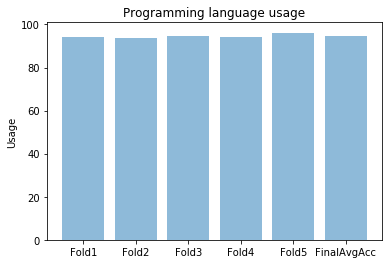

In [82]:
objects = ('Fold1', 'Fold2', 'Fold3','Fold4','Fold5', 'FinalAvgAcc')
y_pos = np.arange(len(objects))
performance = [94.39, 93.80, 94.69, 93.95, 96.16, 94.60]

plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.ylabel('Usage')
plt.title('Programming language usage')

plt.show()

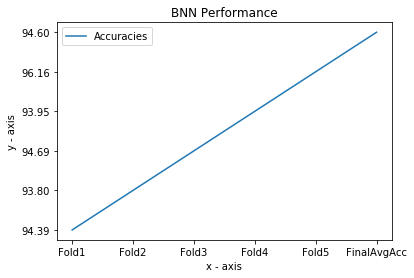

In [54]:
x1 = CrossValidation
y1 = Accuracies
# plotting the line 1 points  
plt.plot(x1, y1, label = "Accuracies") 

plt.xlabel('x - axis') 
# naming the y axis 
plt.ylabel('y - axis') 
# giving a title to my graph 
plt.title('BNN Performance') 
  
# show a legend on the plot 
plt.legend() 
  
# function to show the plot 
plt.show()
